# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Fadhlurrahman Muhammad Wafii
- **Email:** fadhlurrahman1108@gmail.com
- **ID Dicoding:** fdlrhmnmwafii

## Menentukan Pertanyaan Bisnis

- Bagaimana performa penjualan rental sepeda per bulan tiap tahunnya?
- Bagaimana Perbandingan rental sepeda pada saat hari libur dan tidak tiap tahunnya?
- Apakah kondisi musim mempengaruhi banyaknya sewa sepeda?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
bike_sharing_df = pd.read_csv('hour.csv')
bike_sharing_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [ ]:
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
bike_sharing_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
print("Jumlah duplikasi: ", bike_sharing_df.duplicated().sum())
bike_sharing_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [ ]:
bike_sharing_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Correcting Datatype on dteday

In [ ]:
bike_sharing_df['dteday'] = pd.to_datetime(bike_sharing_df['dteday'])
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Rata-rata peminjaman rental sepeda per bulan tiap tahunnya

In [ ]:
monthly_rent_df = bike_sharing_df.groupby(['yr','mnth']).agg({
    'cnt':'mean'
    })


year_mapping = {0: 2011, 1: 2012}

month_mapping = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

monthly_rent_df.rename(index=year_mapping, level='yr', inplace=True)
monthly_rent_df.rename(index=month_mapping, level='mnth', inplace=True)
monthly_rent_df

cnt
yr   mnth                 
2011 January     55.507267
     February    74.291217
     March       87.732877
     April      131.947149
     May        182.555108
     June       199.322222
     July       189.974462
     August     186.991792
     September  177.709902
     October    166.232840
     November   142.095967
     December   117.844804
2012 January    130.558704
     February   149.041908
     March      221.904441
     April      242.651811
     May        263.259409
     June       281.708333
     July       273.665323
     August     288.310484
     September  303.573611
     October    280.848870
     November   212.623955
     December   166.729111

### Perbandingan rental sepeda pada hari libur dan hari kerja per tahunnya

In [ ]:
rent_bike_2011 = bike_sharing_df[bike_sharing_df['yr']==0]
rent_bike_2012 = bike_sharing_df[bike_sharing_df['yr']==1]

days_mapping = {
    0 : 'Working Days',
    1 : 'Holidays'
}

rent_bike_2011['holiday'] = rent_bike_2011['holiday'].map(days_mapping)

<ipython-input-9-d14f56c99cca>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rent_bike_2011['holiday'] = rent_bike_2011['holiday'].map(days_mapping)


In [ ]:
rent_bike_2012['holiday'] = rent_bike_2012['holiday'].map(days_mapping)

<ipython-input-10-20f07dee8074>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rent_bike_2012['holiday'] = rent_bike_2012['holiday'].map(days_mapping)


In [ ]:
grouped_by_holiday_2011 = rent_bike_2011.groupby('holiday')['cnt'].count()
grouped_by_holiday_2011

holiday
Holidays         239
Working Days    8406
Name: cnt, dtype: int64

In [ ]:
grouped_by_holiday_2012 = rent_bike_2012.groupby(['holiday'])['cnt'].count()
grouped_by_holiday_2012

holiday
Holidays         261
Working Days    8473
Name: cnt, dtype: int64

### Rata-rata sewa sepeda terhadap kondisi musim

In [ ]:
season_df = bike_sharing_df

In [ ]:
season_labels = {
    1 : 'Clear',
    2 : 'Mist',
    3 : 'Light (Snow/Rain)',
    4 : 'Heavy Rain'
}
season_df['season'] = season_df['season'].map(season_labels)

In [ ]:
group_season = season_df.groupby('season')['cnt'].sum().reset_index().sort_values('cnt')

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa penjualan rental sepeda per bulan tiap tahunnya?

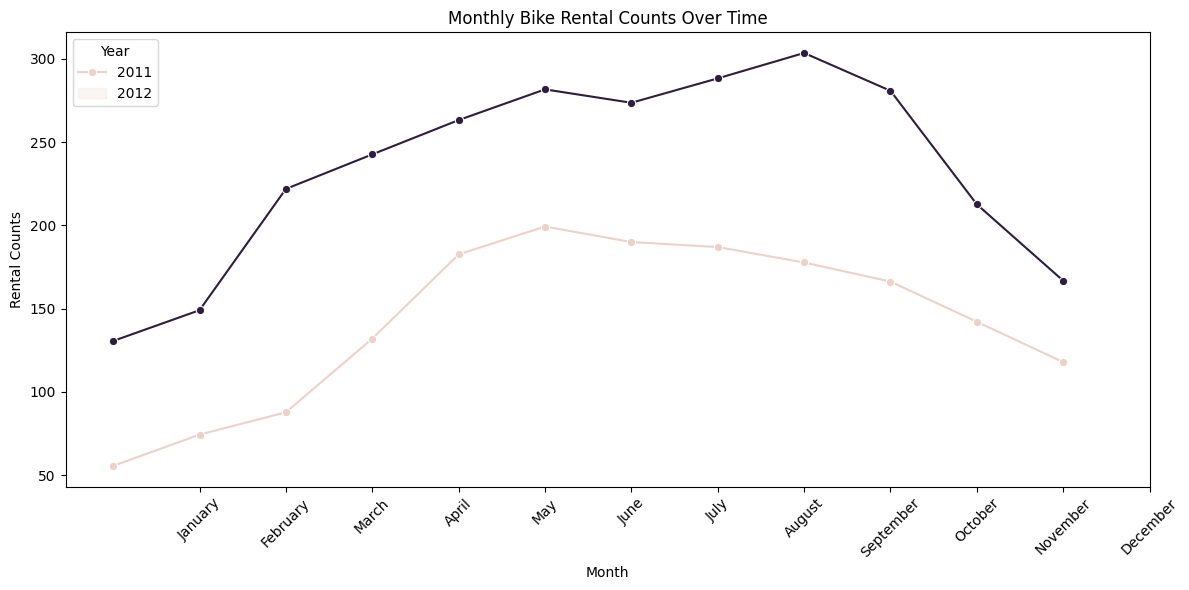

In [ ]:
monthly_rent_df.reset_index(inplace=True)
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_rent_df, x='mnth', y='cnt', hue='yr', marker='o')

plt.title('Monthly Bike Rental Counts Over Time')
plt.xlabel('Month')
plt.ylabel('Rental Counts')

plt.legend(title='Year', labels=['2011', '2012'], loc='upper left')

# Plotting
plt.xticks(range(1, 13), month_mapping.values(), rotation=45)
plt.tight_layout()
plt.show()

### Pertanyaan 2: Bagaimana Perbandingan rental sepeda pada saat hari libur dan tidak tiap tahunnya?

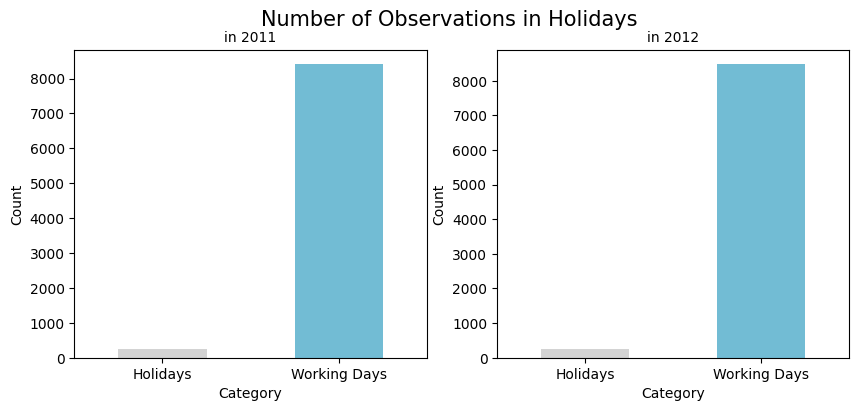

In [ ]:
colors = ["#D3D3D3", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
plt.suptitle('Number of Observations in Holidays', fontsize=15)

grouped_by_holiday_2011.plot(kind='bar', color=colors, ax=ax[0])
ax[0].set_title('in 2011', loc="center", fontsize=10)
ax[0].set_xlabel('Category')
ax[0].set_ylabel('Count')
ax[0].tick_params(axis ='y', labelsize=10)
ax[0].tick_params(axis ='x', labelsize=10)
ax[0].set_xticklabels(grouped_by_holiday_2011.index, rotation=0)

grouped_by_holiday_2012.plot(kind='bar', color=colors, ax=ax[1])
ax[1].set_title('in 2012', loc="center", fontsize=10)
ax[1].set_xlabel('Category')
ax[1].set_ylabel('Count')
ax[1].tick_params(axis ='y', labelsize=10)
ax[1].tick_params(axis ='x', labelsize=10)
ax[1].set_xticklabels(grouped_by_holiday_2012.index, rotation=0)

plt.show()

### Pertanyaan 3: Apakah kondisi musim mempengaruhi banyaknya sewa sepeda?

In [ ]:
group_season

,season,cnt
0,Clear,471348
1,Heavy Rain,841613
3,Mist,918589
2,Light (Snow/Rain),1061129


<ipython-input-33-2370187413aa>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


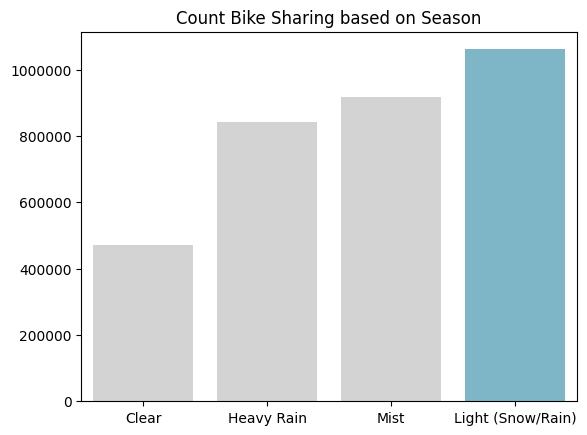

In [ ]:
colors = ["#D3D3D3","#D3D3D3", "#D3D3D3", "#72BCD4"]
sns.barplot(
    x = 'season',
    y = 'cnt',
    data=group_season,
    palette=colors
)

plt.title('Count Bike Sharing based on Season')
plt.xlabel(None)
plt.ylabel(None)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

## Conclusion

- **Conclution pertanyaan 1**: Jika dilihat bahwa 2011 memiliki rata-rata peminjaman sepeda paling banyak dibandingkan tahun 2012. Pada bulan agustus 2011 rata-rata tingkat peminjaman sepeda yang paling tinggi, sedangkan bulan Januari 2012 rata-rata tingkat peminjaman sepeda yang paling rendah.
- **Conclution pertanyaan 2**: Jika dilihat dari graf tersebut bahwa adanya perbedaan yang signifikan jumlah rental sepeda pada saat hari libur dan hari kerja tiap tahunnya. Orang-orang lebih banyak meminjam sepeda pada saat hari-hari kerja dibandingkan hari libur.
- **Conclution pertanyaan 3**: Dari graf tersebut dapat dilihat bahwa tidak ada hubungan yang signifikan terhadap peminjaman sepeda dengan kondisi musim. Tingkat peminjaman sepeda paling rendah pada musim cerah, sedangkan yang tertinggi pada musim hujan ringan.